In [2]:
# !python runner.py --fold 0 --log_dir out --version 0 --model DimeNet
# !python runner.py --fold 0 --log_dir out --version 0 --model CustomGNN_1
# !python runner.py --fold 0 --log_dir out --version 0 --model CustomGNN_2
# !python runner.py --fold 0 --log_dir out --version 0 --model CustomGNN_3

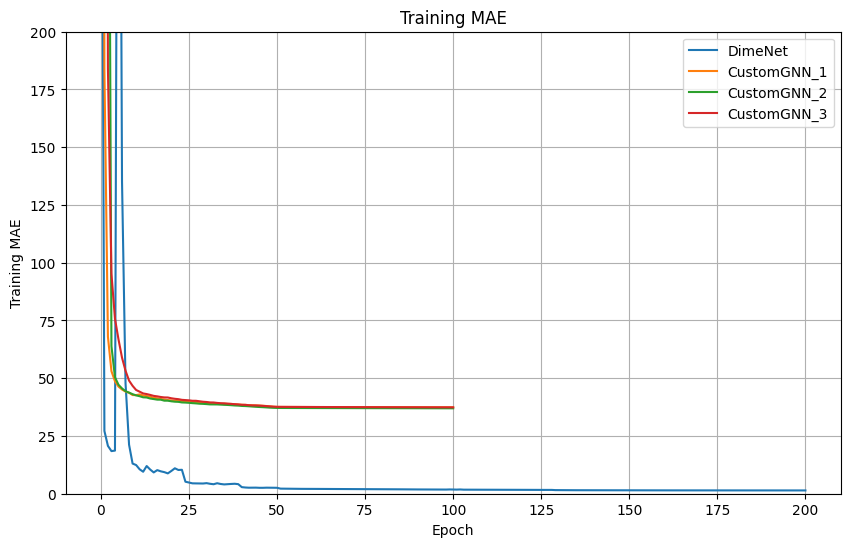

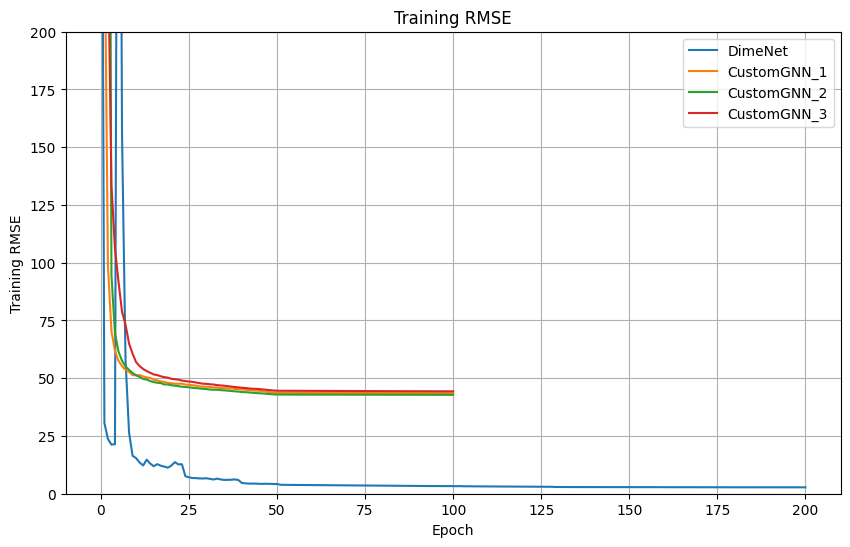

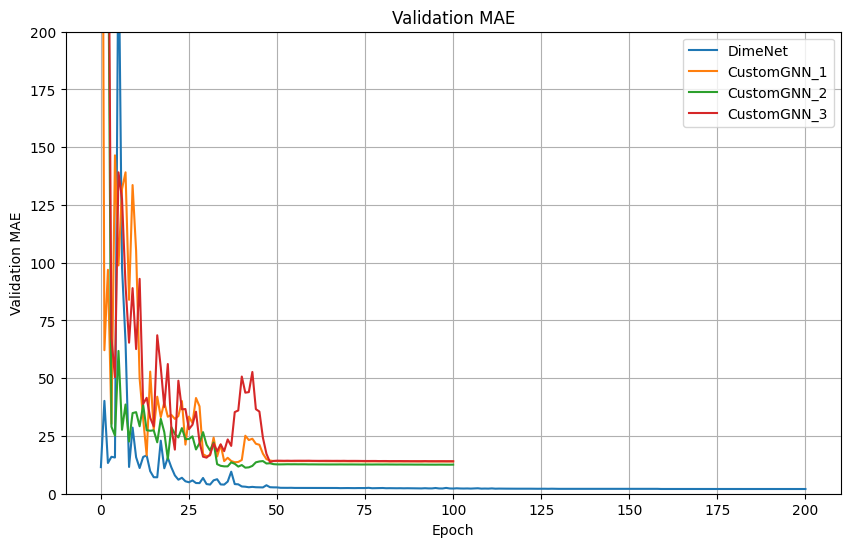

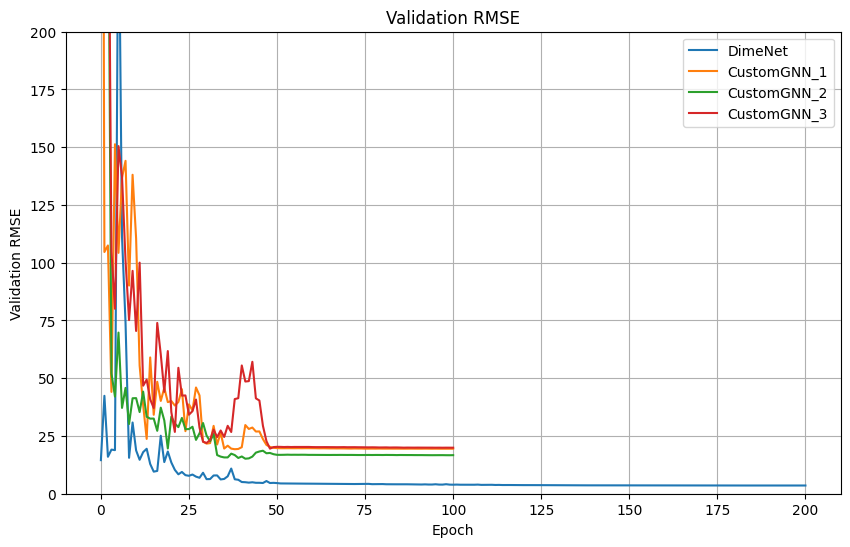


Final TEST_MAE values for each model:
DimeNet: 2.0417
CustomGNN_1: 13.9700
CustomGNN_2: 12.5893
CustomGNN_3: 14.0515

Final TEST_RMSE values for each model:
DimeNet: 3.5544
CustomGNN_1: 19.4811
CustomGNN_2: 16.6937
CustomGNN_3: 19.9272


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

log_dir = 'out'
models = ['DimeNet',
          'CustomGNN_1', 
          'CustomGNN_2', 
          'CustomGNN_3'
          ]

model_metrics = {}

# Load metrics
for model in models:
    file_path = os.path.join(log_dir, model, 'f0_0/metrics.csv')
    if os.path.exists(file_path):
        model_metrics[model] = pd.read_csv(file_path).groupby('epoch').mean()

# Define metrics to plot and their formal names
metrics_to_plot = {
    'train_mae': 'Training MAE',
    'train_rmse': 'Training RMSE',
    'val_mae': 'Validation MAE',
    'val_rmse': 'Validation RMSE',
}

# Plot metrics
for metric, formal_name in metrics_to_plot.items():
    plt.figure(figsize=(10, 6))
    
    for model, df in model_metrics.items():
        # Check if the metric column exists in the dataframe
        if metric in df.columns:
            plt.plot(df.index, df[metric], label=model)
    plt.ylim([0, 200])
    plt.grid(True)
    plt.title(formal_name)
    plt.xlabel('Epoch')
    plt.ylabel(formal_name)
    plt.legend()
    plt.show()

# Print the final test metrics
test_metrics = ['test_mae', 'test_rmse']

for metric in test_metrics:
    print(f"\nFinal {metric.upper()} values for each model:")
    for model, df in model_metrics.items():
        if metric in df.columns:
            final_value = df[metric].iloc[-1]
            print(f"{model}: {final_value:.4f}")
